# Create json file of time-of-day PTC counts for Fig 4 lineChart

See https://github.com/CityofToronto/bdit_vfh/blob/master/notebooks/vfh_final.ipynb  

ref: https://geoffboeing.com/2015/10/exporting-python-data-geojson/  
Huom: `with open(output_filename, 'wb') as output_file:` should be `'w'` not `'wb'`  

**Resources**  
geoJSON minifier: https://jsonformatter.org/json-minify  

## Fig 4 Query (Fig4_tod_counts_city.sql)

see: https://github.com/CityofToronto/bdit_vfh/blob/master/notebooks/vfh_final.ipynb  
**Trips by Time of Day and Day of Week, September 2018**  
**Exhibit 3-7**    


```
CREATE TABLE cnangini.fig4_tod_counts_city AS
WITH sum AS (
	SELECT pickup_datetime, hr, 
		sum(count) as count, 
		extract(month from pickup_datetime) as mon, 
		extract(year from pickup_datetime) as yr,
		extract(dow from pickup_datetime) as dow 
	FROM ptc.trip_data_agg_ward_25
	WHERE pickup_datetime > '2018-08-31'
	GROUP BY pickup_datetime, hr
), 

collect AS (
	SELECT  avg(count) as count, hr, dow 
	FROM sum
	GROUP BY hr, dow
)

SELECT 
	--period_name, period_uid, 
	count, hr, 
	CASE WHEN dow = 0 THEN 7 ELSE dow END AS dow
FROM collect
-- LEFT JOIN ptc.period_lookup_simple ON dow=period_dow AND hr=period_hr
-- LEFT JOIN ptc.periods_simple USING (period_uid)
ORDER BY dow, hr
```

_**Note:** table `cnangini.fig4_tod_counts_city` to be deleted from schema; saved as `~/Documents/PROJECTS/VFH/COT_PAGE/INTERIM_DATA/FROM_PGADMIN/Fig4_tod_counts_city.csv`_

In [105]:
import sys
sys.executable

'/home/test/anaconda3/envs/vfh/bin/python'

In [106]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

from IPython.display import HTML, display
import datetime
import matplotlib.dates as mdates
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os

from datetime import datetime

import json

# Read tod counts data
Note: already ordered starting from Monday (dow=1).

In [107]:
fname = '../../../Documents/PROJECTS/VFH/COT_PAGE/INTERIM_DATA/FROM_PGADMIN/Fig4_tod_counts_city.csv'

df = pd.read_csv(fname)

print(df.shape)
df.head(5)

(168, 3)


,count,hr,dow
0,4166.75,0,1
1,3010.75,1,1
2,2488.25,2,1
3,1598.75,3,1
4,1312.25,4,1


# Check against database

## pick-ups, Monday, hr 0: 15454 rows


```
WITH X AS (
	SELECT 
		TO_CHAR(pickup_datetime, 'FMDay') pickup_dow,
		TO_CHAR(pickup_datetime, 'HH24') pickup_hr,
		TO_CHAR(dropoff_datetime, 'FMDay') dropoff_dow,
		TO_CHAR(dropoff_datetime, 'HH24') dropoff_hr,
		pickup_ward2018, dropoff_ward2018, pickup_mun_id,
		pickup_neighbourhood, dropoff_neighbourhood
FROM ptc.trip_data_new_geom a
WHERE pickup_mun_id = 69 AND dropoff_mun_id = 69
AND pickup_datetime > '20180901' AND pickup_datetime < '20181001'
)

SELECT COUNT(*)
FROM X
WHERE pickup_dow = 'Monday'
AND pickup_hr = '00'
```

**15454 rows**  


## pick-ups, Monday, hr 2: 9150 rows

## drop-offs, Monday, hr 2: 9145 rows

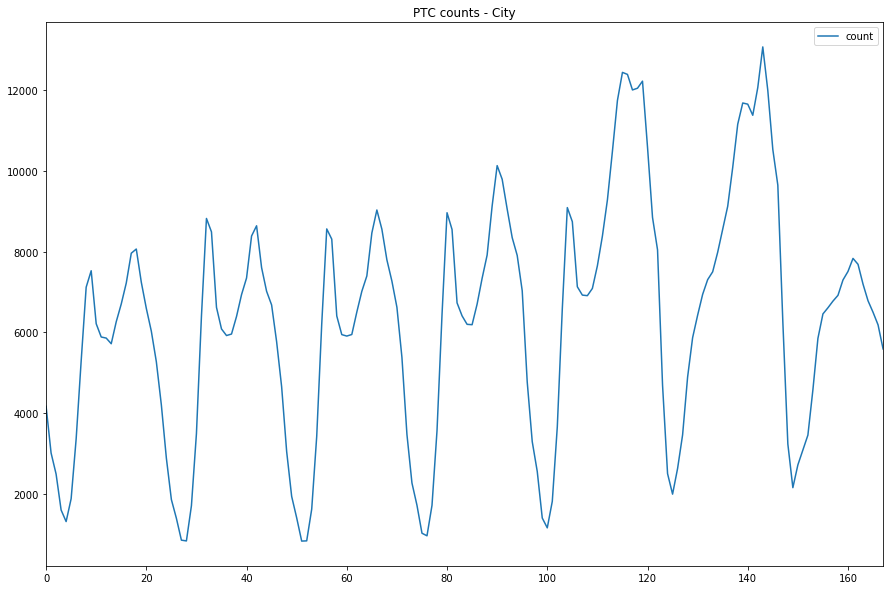

In [110]:
df.plot(y=["count"], kind="line", use_index=True, title='PTC counts - City', figsize=(15,10))

In [ ]:
df=

# Create json object and write to file
Format:  
```
{
	"keys": {
		"name": "tod",
		"values": [
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167
		]
	},
	"pudo": [0.3234158,0.21998841,0.18961688,0.15678278,0.13872403, 0.48019858,0.36938352...
        ]
}
```

In [115]:
ptcjson = {
    "keys":{
        "name":"tod", 
        "values":np.arange(df.shape[0]).tolist()
    },
    "count":pd.to_numeric(df['count'], downcast='signed').tolist()
}

ptcjson

{'keys': {'name': 'tod',
  'values': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   

## Write json to file
https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

In [116]:
df.shape

(168, 3)

In [117]:
import json

mydir = '../src/data/'
# mydir = '/home/nangini/Documents/PROJECTS/BDITTO/VFH/DATA_STORY/DATA/JSONS/'

file = 'fig4_tod_city.json'

fname = mydir + file
with open(fname, 'w') as outfile:
    json.dump(ptcjson, outfile)

In [118]:
print("200 OK")

200 OK
